# Citi Bike System Data Eploration and Analysis
## by Nour Emam

# Table of Contents
- [Preliminary Wrangling](#PW)
- [Univariate Exploration](#UE)
- [Bivariate Exploration](#BE)
- [Multivariate Exploration](#ME)

<a id='PW'></a>
## Preliminary Wrangling

Citi Bike is the largest bike share program in NYC. This dataset is the Citi Bike data provided via Bikeshare for 2019 and 2020. The purpose of the exploration is to analyse the factors influencing number of bike rides, their frequency and duration and the impact of COVID-19 on the bike share program.  

In the next section, we'll import the dataset, assess it to identify the variables of interest and make sure it is clean and tidy for analysis.

Please note that due to the large number of rows per month, a random sample was generated from each month for the 2019 and 2020 datasets to accomodate the limited processing power available to run this analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import requests
import zipfile
from datetime import datetime as dt
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [157]:
#downloading 2019 and 2020 files using Requests

def download_files(lower_bound, upper_bound):
    """Loop on files with filenames containing anything between lower and upper bound
         and download ZIP files"""
    for x in range(lower_bound, upper_bound):
        url = 'https://s3.amazonaws.com/tripdata/{}-citibike-tripdata.csv.zip'.format(x)
        print(url)
        response = requests.get(url)
    
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)
        
##2019 files
download_files(201901, 201913)

##2020 files
download_files(202001, 202013)

https://s3.amazonaws.com/tripdata/201901-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201902-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201903-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201904-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201906-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201908-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201910-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201911-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201912-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202001-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202002-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202003-citibike-tripdata.csv

In [180]:
#for each zip file downloaded, extract the CSV into a dataframe and get a random sample by month then append all
#save the resulting dataframes locally as 2 CSV files, one for 2019 and another for 2020
def write_df(lower_bound, upper_bound, df_name, csv_name):
     """Loop on files with filenames containing anything between lower and upper bound
         create a dataframe and save locally as CSV"""
    df_name = pd.DataFrame()

    for x in range(lower_bound, upper_bound):
        zip_filename = '{}-citibike-tripdata.csv.zip'.format(x)
        print(zip_filename)
        csv_filename = '{}-citibike-tripdata.csv'.format(x)
        zf = zipfile.ZipFile(zip_filename)
        df_temp = pd.read_csv(zf.open(csv_filename))
        df_temp = df_temp.sample(frac = 0.1)
        df_name = df_name.append(df_temp)
        
    df_name.to_csv(csv_name, index=False)
    
##2019 df
write_df(201901, 201913, 'df_2019', '2019_trips.csv')

##2020 df
write_df(202001, 202013, 'df_2020', '2020_trips.csv')

201901-citibike-tripdata.csv.zip
201902-citibike-tripdata.csv.zip
201903-citibike-tripdata.csv.zip
201904-citibike-tripdata.csv.zip
201905-citibike-tripdata.csv.zip
201906-citibike-tripdata.csv.zip
201907-citibike-tripdata.csv.zip
201908-citibike-tripdata.csv.zip
201909-citibike-tripdata.csv.zip
201910-citibike-tripdata.csv.zip
201911-citibike-tripdata.csv.zip
201912-citibike-tripdata.csv.zip
202001-citibike-tripdata.csv.zip
202002-citibike-tripdata.csv.zip
202003-citibike-tripdata.csv.zip
202004-citibike-tripdata.csv.zip
202005-citibike-tripdata.csv.zip
202006-citibike-tripdata.csv.zip
202007-citibike-tripdata.csv.zip
202008-citibike-tripdata.csv.zip
202009-citibike-tripdata.csv.zip
202010-citibike-tripdata.csv.zip
202011-citibike-tripdata.csv.zip
202012-citibike-tripdata.csv.zip


In [2]:
df_2019 = pd.read_csv('2019_trips.csv')
df_2020 = pd.read_csv('2020_trips.csv')

In [3]:
df_2019.shape

(2055168, 15)

In [4]:
df_2020.shape

(1950685, 15)

In [5]:
#create a main dataframe by appending 2019 and 2020 data
df_main = df_2019.append(df_2020)

In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005853 entries, 0 to 1950684
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         float64
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           float64
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 489.0+ MB


In [7]:
#drop unnecessary columns since they will not be used as part of the analysis
df_main.drop(columns=['start station latitude', 'start station longitude', 'end station latitude', 'end station longitude'], inplace=True)

In [8]:
#remove spaces from some of the column names
df_main.columns = df_main.columns.str.replace(' ', '')

In [9]:
#change data types for the start and stop times to timestamp
df_main['starttime'] = pd.to_datetime(df_main['starttime'])
df_main['stoptime'] = pd.to_datetime(df_main['stoptime'])

In [10]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005853 entries, 0 to 1950684
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   tripduration      int64         
 1   starttime         datetime64[ns]
 2   stoptime          datetime64[ns]
 3   startstationid    float64       
 4   startstationname  object        
 5   endstationid      float64       
 6   endstationname    object        
 7   bikeid            int64         
 8   usertype          object        
 9   birthyear         int64         
 10  gender            int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 366.7+ MB


In [11]:
df_main['month'] = df_main['starttime'].dt.month
df_main['year'] = df_main['starttime'].dt.year

In [13]:
#setting month as a categorical variable
month_category = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_class = pd.api.types.CategoricalDtype(ordered=True, categories=month_category)

In [14]:
df_main.month.value_counts()

9     493312
8     467373
10    434144
7     428687
6     400764
5     341245
11    321541
4     244885
3     239642
1     220789
2     209057
12    204414
Name: month, dtype: int64

In [15]:
df_main.year.value_counts()

2019    2055168
2020    1950685
Name: year, dtype: int64

In [16]:
df_main['age'] = df_main.year - df_main.birthyear

In [17]:
df_main.head(10)

tripduration               starttime                stoptime  \
0           286 2019-01-21 21:08:31.260 2019-01-21 21:13:17.829   
1           751 2019-01-07 13:34:05.264 2019-01-07 13:46:36.551   
2           401 2019-01-26 13:32:40.025 2019-01-26 13:39:21.237   
3           868 2019-01-30 16:15:51.158 2019-01-30 16:30:19.282   
4           663 2019-01-30 09:39:40.738 2019-01-30 09:50:44.214   
5          1289 2019-01-02 11:51:12.083 2019-01-02 12:12:41.207   
6           340 2019-01-31 13:53:49.477 2019-01-31 13:59:29.618   
7           511 2019-01-04 14:21:04.230 2019-01-04 14:29:35.551   
8           247 2019-01-10 15:03:27.701 2019-01-10 15:07:35.329   
9           216 2019-01-10 06:58:42.514 2019-01-10 07:02:18.938   

   startstationid           startstationname  endstationid  \
0          3101.0      N 12 St & Bedford Ave         471.0   
1          3686.0  Gansevoort St & Hudson St         438.0   
2           279.0       Peck Slip & Front St         146.0   
3           285.0         Broadway & E 14 St         402.0   
4           445.0         E 10 St & Avenue A         285.0   
5           474.0            5 Ave & E 29 St        3443.0   
6           498.0         Broadway & W 32 St         472.0   
7          3223.0            E 55 St & 3 Ave         485.0   
8           448.0           W 37 St & 10 Ave         529.0   
9           499.0         Broadway & W 60 St         530.0   

            endstationname  bikeid    usertype  birthyear  gender  month  \
0  Grand St & Havemeyer St   34680  Subscriber       1984       1      1   
1      St Marks Pl & 1 Ave   32707  Subscriber       1982       1      1   
2     Hudson St & Reade St   27166  Subscriber       1986       1      1   
3       Broadway & E 22 St   20943  Subscriber       1989       1      1   
4       Broadway & E 14 St   24944  Subscriber       1988       1      1   
5          W 52 St & 6 Ave   26378    Customer       1994       1      1   
6       E 32 St & Park Ave   14720  Subscriber       1974       1      1   
7          W 37 St & 5 Ave   35275  Subscriber       1992       2      1   
8          W 42 St & 8 Ave   24945  Subscriber       1976       1      1   
9         11 Ave & W 59 St   16876  Subscriber       1980       1      1   

   year  age  
0  2019   35  
1  2019   37  
2  2019   33  
3  2019   30  
4  2019   31  
5  2019   25  
6  2019   45  
7  2019   27  
8  2019   43  
9  2019   39

In [18]:
df_main.endstationname.isnull().sum()

20

In [19]:
df_main.bikeid.nunique()

27576

In [20]:
df_main.gender = df_main.gender.replace(1, 'Male')
df_main.gender = df_main.gender.replace(2, 'Female')
df_main.gender = df_main.gender.replace(0, 'Unknown')

### What is the structure of your dataset?

The Citi Bike dataset consists of 4,005,853 records and 11 variables. Each record is an entry of a bike trip recorded throughout 2019 and 2020. There are 27,576 unique bikes in the dataset. Below is a short description of each of the variables:
1. tripduration: Duration of the bike trip in seconds
2. starttime: Trip start date and time
3. stoptime: Trip end date and time
4. startstationid: Starting station ID
5. startstationname: Starting station name
6. endstationid: Ending station ID
7. endstationname: Ending station name
8. bikeid: Unique identifier of the bike
9. usertype: Type of the user renting the bike, can be a **customer** that buys a 24-hour or 3-day pass or a **subscriber** with an annual pass
10. birthyear: Year of birth
11. gender: Gender. 0 = unknown, 1 = male and 2 = female

Month, year and age are derived columns from the existing variables as we prepare the dataset for analysis.

### What is/are the main feature(s) of interest in your dataset?

Main questions I'd like to explore in this analysis are:

What are the characteristics that influence the usage of the bike rental platform and which variables would best predict the trip duration?

Those can be broken down to the below:  

 - Most common age groups that use the bike share platform  
 - Gender among which the bike share platform is most popular
 - Average duration of the trips  
 - Most common month for using the platform  
 - Does the age affect duration of a trip?
 - Does the gender affect the duration of a bike trip? 
 - Does being a customer vs subscriber affect the duration of a trip? 
 - Is the platform more popular for a specific user type?  
 - How did the COVID-19 March 2020 lockdown affect the platform usage? Did it recover? If yes, when?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the age, gender, date/month and user type will be among the factors that influence the frequency of usage of the bike share platform as well as the duration of a single trip or bike rental. I also expect that COVID-19 affected the usage of the platform which will show in March and April 2020.


<a id='UE'></a>
## Univariate Exploration

In this section, we'll start by exploring and plotting distributions for individual variables to gain better understanding and prepare for more in depth analysis.

In [54]:
#setting base and secondary colours to be used across the graphs
base_color = sb.color_palette('Set2')[0]
secondary_color = sb.color_palette('Set2')[1]

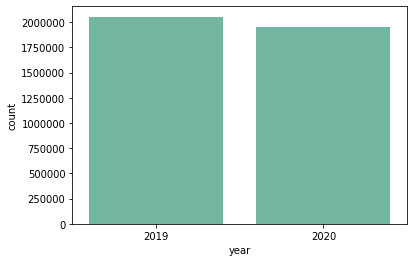

In [53]:
#double checking count of records for 2019 vs 2020
sb.countplot(data=df_main, x='year', color=base_color);

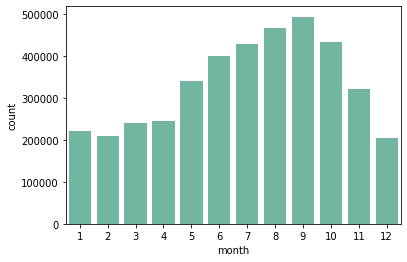

In [22]:
#plotting counts per month
sb.countplot(data=df_main, x='month', color=base_color);

As shown above, number of trips during the colder months is much lower, it begins to rise as weather becomes warmer around May and keeps increasing reaching the highest number in September then falls back in October, November and December.

In [23]:
#sum of records with value gender is not null (should be all records)
gender_overall = df_main['gender'].value_counts().sum()
#count per gender type
gender_counts = df_main['gender'].value_counts()
#calculate the proportion
gender_prop = gender_counts / gender_overall
#range for proportion ticks on the graph
tick_props = np.arange(0, max(gender_prop)+0.1, 0.1)
#make sure proportion is displayed in the correct format - float to the nearest 2 decimal points
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

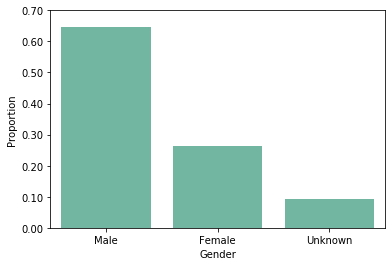

In [25]:
sb.countplot(data=df_main, x='gender', color=base_color);
# Change the tick locations and labels
plt.yticks(gender_overall * tick_props, tick_names)
plt.ylabel('Proportion')
plt.xlabel('Gender');

According to the graph, the highest proportion of bike renters are Males at around 65%, proportion of Females is around 26% and around 9% of the renters are unknown.

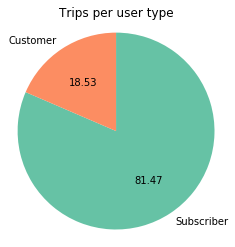

In [40]:
# User type
usertype_counts = df_main['usertype'].value_counts()
#specifying the 2 colours to be used (since it's pre known that there are 2 user types)
colors = [base_color, secondary_color]
plt.pie(usertype_counts, labels = usertype_counts.index, startangle = 90, counterclock = False, colors=colors, autopct='%.2f');
plt.axis('square')
plt.title('Trips per user type');

Looking at the user types, the majority of users as Subscribers which according to the data dictionary are people with an annual pass. Only around 18.53% the dataset is customers who buy a 24-hour or 3-day pass.

In [27]:
# Age distribution
age_percentile = df_main.age.describe([.25,.5,.75,.9,.95,.99])
age_percentile

count    4.005853e+06
mean     3.882918e+01
std      1.225814e+01
min      1.600000e+01
25%      2.900000e+01
50%      3.600000e+01
75%      5.000000e+01
90%      5.500000e+01
95%      6.000000e+01
99%      6.900000e+01
max      1.470000e+02
Name: age, dtype: float64

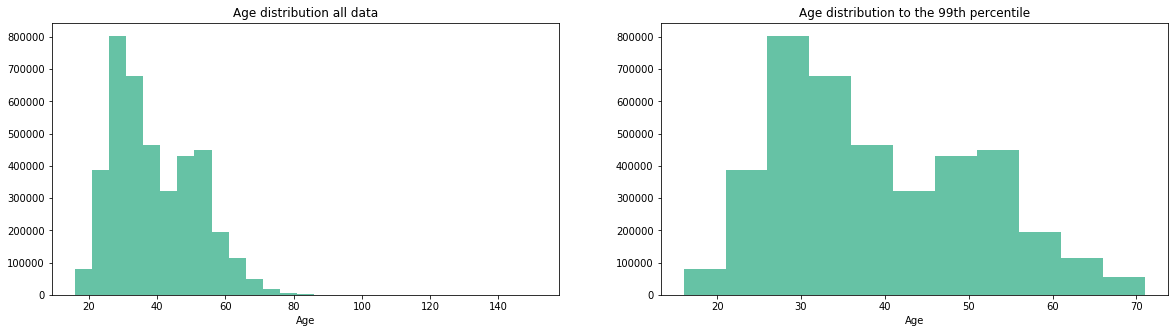

In [28]:
#plotting 2 histograms to show age overall and age distribution to the 99th percentile
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) 
bins = np.arange(df_main['age'].min(), df_main['age'].max()+5, 5)
plt.hist(data = df_main, x = 'age', bins=bins, color=base_color)
plt.title('Age distribution all data')
plt.xlabel('Age');

plt.subplot(1, 2, 2)
bins = np.arange(df_main['age'].min(), age_percentile['99%']+5, 5)
plt.hist(data = df_main, x = 'age', bins=bins, color=base_color)
plt.title('Age distribution to the 99th percentile')
plt.xlabel('Age');

The histogram on the left shows the distribution of the ages across the whole dataset. Minimum age is 16 and maximum is 140 which gives the impression that there might be some errors in the year of birth data entries. Due to this fact, I plotted another distribution on the right that shows that 99% of the data falls between 16 and 69. The distribution is bimodal with two peaks one around 30 and another around 50.

In [29]:
# Duration distribution
duration_percentile = df_main.tripduration.describe([.25,.5,.75,.9,.95,.99])
duration_percentile

count    4.005853e+06
mean     1.133967e+03
std      1.217656e+04
min      6.100000e+01
25%      3.880000e+02
50%      6.860000e+02
75%      1.236000e+03
90%      1.904000e+03
95%      2.404000e+03
99%      4.523000e+03
max      3.475785e+06
Name: tripduration, dtype: float64

In [30]:
#visually assessing rows with minimum values
df_main[df_main['tripduration'] <= 100]

tripduration               starttime                stoptime  \
197                94 2019-01-17 07:48:17.282 2019-01-17 07:49:51.690   
374                69 2019-01-14 21:31:21.971 2019-01-14 21:32:31.609   
381                97 2019-01-08 20:24:47.835 2019-01-08 20:26:25.004   
447               100 2019-01-18 17:35:19.609 2019-01-18 17:36:59.653   
480               100 2019-01-26 22:41:50.698 2019-01-26 22:43:31.483   
...               ...                     ...                     ...   
1950315            98 2020-12-08 17:36:55.959 2020-12-08 17:38:33.988   
1950337            80 2020-12-23 13:30:53.922 2020-12-23 13:32:14.407   
1950441            91 2020-12-03 09:20:39.169 2020-12-03 09:22:10.353   
1950592            80 2020-12-06 11:22:38.727 2020-12-06 11:23:58.795   
1950676            99 2020-12-18 14:15:11.999 2020-12-18 14:16:51.105   

         startstationid             startstationname  endstationid  \
197              3676.0   Van Brunt St & Van Dyke St        3344.0   
374              3360.0      Amsterdam Ave & W 79 St        3162.0   
381               331.0          Pike St & Monroe St         340.0   
447              3656.0            E 2 St & Avenue A         317.0   
480              3101.0        N 12 St & Bedford Ave        3107.0   
...                 ...                          ...           ...   
1950315           350.0        Clinton St & Grand St         340.0   
1950337          3243.0  E 58 St & 1 Ave (NE Corner)        3142.0   
1950441           388.0             W 26 St & 10 Ave         458.0   
1950592          4040.0        Madison Ave & E 26 St        3641.0   
1950676          3799.0              6 Ave & W 34 St         267.0   

                    endstationname  bikeid    usertype  birthyear   gender  \
197      Pioneer St & Van Brunt St   21303  Subscriber       1986     Male   
374             W 78 St & Broadway   28429  Subscriber       1962     Male   
381        Madison St & Clinton St   20617  Subscriber       1969  Unknown   
447              E 6 St & Avenue B   29018  Subscriber       1978  Unknown   
480       Bedford Ave & Nassau Ave   30003  Subscriber       1986     Male   
...                            ...     ...         ...        ...      ...   
1950315    Madison St & Clinton St   47058  Subscriber       1985     Male   
1950337            1 Ave & E 62 St   39278  Subscriber       2001     Male   
1950441           11 Ave & W 27 St   41654  Subscriber       1963     Male   
1950592         Broadway & W 25 St   49073  Subscriber       1982     Male   
1950676         Broadway & W 36 St   47526  Subscriber       1993     Male   

         month  year  age  
197          1  2019   33  
374          1  2019   57  
381          1  2019   50  
447          1  2019   41  
480          1  2019   33  
...        ...   ...  ...  
1950315     12  2020   35  
1950337     12  2020   19  
1950441     12  2020   57  
1950592     12  2020   38  
1950676     12  2020   27  

[41212 rows x 14 columns]

In [31]:
#check how many records are greater than 99th percentile of duration
df_main[df_main['tripduration'] > 4523].count()[0]

40048

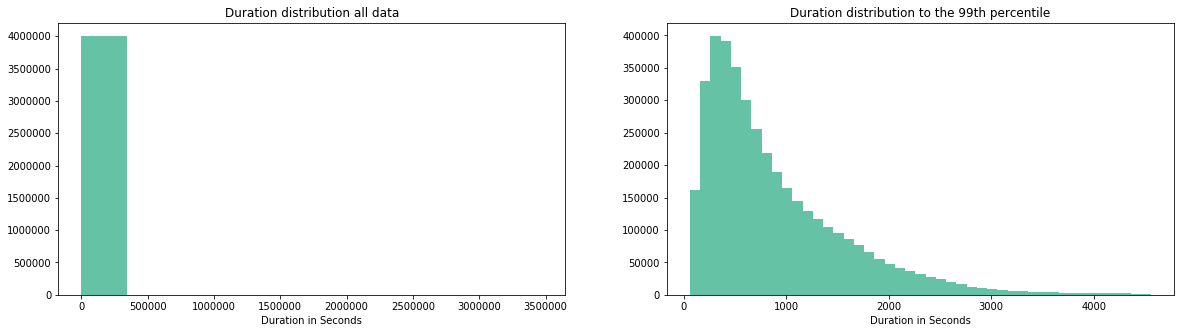

In [32]:
#plotting 2 histograms to show duration in seconds overall and duration distribution to the 99th percentile

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) 
plt.hist(data = df_main, x = 'tripduration', color=base_color)
plt.title('Duration distribution all data')
plt.xlabel('Duration in Seconds');

plt.subplot(1, 2, 2) 
bins = np.arange(df_main['tripduration'].min(), duration_percentile['99%']+100, 100)
plt.hist(data = df_main, x = 'tripduration', bins=bins, color=base_color)
plt.title('Duration distribution to the 99th percentile')
plt.xlabel('Duration in Seconds');

Duration in the data is given in seconds. The histogram on the left shows the distribution of duration across the full dataset, it does not give any insight however it does show that there are huge difference in the duration values. If we 'zoom in' to view 99% of the data which eliminates the extreme large values we can see that the distribution is unimodal but still unable to identify the value of the peak. We're going to try the log transformation on the x-axis to see how that could enhance the visualization.

In [33]:
#log transformation distribution
np.log10(df_main['tripduration'].describe())

count    6.602695
mean     3.054601
std      4.085525
min      1.785330
25%      2.588832
50%      2.836324
75%      3.092018
max      6.541053
Name: tripduration, dtype: float64

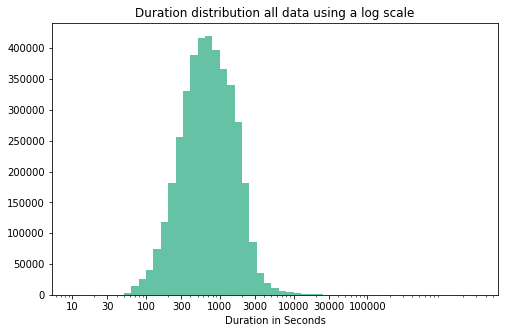

In [34]:
#Using a log scale to display the duration distribution given that it seems from the graph above on the left that there are large differences between the values
plt.figure(figsize = [8, 5])
bins = 10 ** np.arange(1, 6.5+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_main, x = 'tripduration', bins=bins, color=base_color)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Duration distribution all data using a log scale')
plt.xlabel('Duration in Seconds');

Using a log scale, the unimodal distribution is a bit clearer with the peak below 1000 seconds.  Looking at this I think it's better to transform the seconds into minutes and take a look at the distribution of the duration in minutes as it would be more interpretable.

In [38]:
#add a column duration in minutes
df_main['tripdurationmins'] = df_main.tripduration / 60
#describe duration in minutes
df_main['tripdurationmins'].describe([.25,.5,.75,.9,.95,.99])

count    4.005853e+06
mean     1.889946e+01
std      2.029427e+02
min      1.016667e+00
25%      6.466667e+00
50%      1.143333e+01
75%      2.060000e+01
90%      3.173333e+01
95%      4.006667e+01
99%      7.538333e+01
max      5.792975e+04
Name: tripdurationmins, dtype: float64

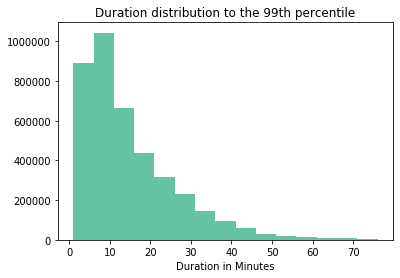

In [139]:
#plot duration in minutes
bins = np.arange(df_main['tripdurationmins'].min(), (duration_percentile['99%'] / 60)+5, 5)
plt.hist(data = df_main, x = 'tripdurationmins', bins=bins, color=base_color)
plt.title('Duration distribution to the 99th percentile')
plt.xlabel('Duration in Minutes');

As expected, this graph is more clearer. The distribution is unimodal and the graph is right-skewed with a long tail to the right. The highest peak is between 5 and 10 minutes, followed by 10 to 15 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


Used log axis transformation to visualize the trip duration since the data is distributed across a large range of values. The peak shows that the majority of the bike trips lasted for a duration of 500 to 1000 seconds, i.e. 8 to 18 minutes. However when taking a look at the minutes, it gives a better break down of the distribution and shows that the highest number of trips lasted between 5 to 10 minutes followed by the second peak from 10 to 15 minute trips. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


Trip duration is highly skewed ranging from trips that lasted merely 1 minute to durations of more that 30 days! Taking a closer look at the very brief durations it seems like the start and end stations of most of those trips are the same or very close. 40,048 out of 4,005,853 rows (just under 1% of the dataset) show trip duration of more than 1.25 hours which is more than the 99th percentile of the data points. Also added a new column tripdurationmins to the dataset which is the trip duration / 60 to display the duration in minutes which makes it more readable and interpretable.

Another interesting observation is that 60% of the users are males and 81.47% are subscribers.

<a id='BE'></a>
## Bivariate Exploration

In this section, I'll start looking at each of the characteristics (age, gender, usertype) as well as the month and comparing those against the duration in minutes. We also want to compare the years 2019 vs 2020 to check the effect of COVID-19 on bike rentals.

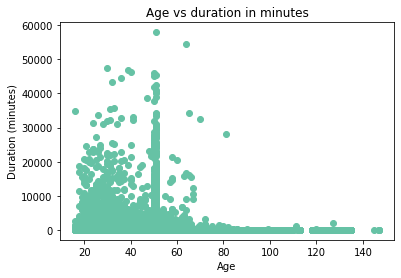

In [41]:
#age and duration scatterplot
plt.scatter(data = df_main, x = 'age', y = 'tripdurationmins', color=base_color);
plt.xlabel('Age')
plt.ylabel('Duration (minutes)')
plt.title('Age vs duration in minutes');

The above graph does not clearly show the relationship if any between the age and trip duration. There are some extreme values in the age < 100 which are less than 1% of the dataset, these can be excluded and the graph replotted as per below.

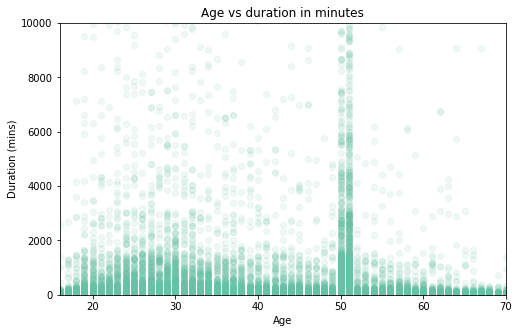

In [42]:
#taking a closer look by zooming in on the age less than 99th percentile by setting the limit on the x axis
#to avoid values such as 140 which clearly seem to be errors when inserting the year of birth or default values
#also enhancing the plot by adding some transparency to the data points
plt.figure(figsize = [8, 5])
sb.regplot(data = df_main, x = 'age', y = 'tripdurationmins', scatter_kws={'alpha':1/10}, fit_reg=False, color=base_color)
plt.xlim(16, 70)
plt.ylim(0, 10000)
plt.xlabel('Age')
plt.ylabel('Duration (mins)')
plt.title('Age vs duration in minutes');

This shows a better view of the relationship. Users in their 50s seem to be renting the bikes for longer durations. However, I'm also interested to zoom in on the duration in minutes as I've observed from the distribution that the highest number of trips were around 10 minutes. So which age group is renting the bikes for that duration? Will filter out the duration outliers by creating a new dataframe selecting only the records with duration less than or equal to the 99th percentile and plot again. 

In [39]:
#selecting the trip duration less than the 99th percentile to filter out the outliers and saving to a new dataframe
durations_less_than_99_percentile = df_main[df_main.tripduration <= duration_percentile['99%']]
durations_less_than_99_percentile

tripduration               starttime                stoptime  \
0                 286 2019-01-21 21:08:31.260 2019-01-21 21:13:17.829   
1                 751 2019-01-07 13:34:05.264 2019-01-07 13:46:36.551   
2                 401 2019-01-26 13:32:40.025 2019-01-26 13:39:21.237   
3                 868 2019-01-30 16:15:51.158 2019-01-30 16:30:19.282   
4                 663 2019-01-30 09:39:40.738 2019-01-30 09:50:44.214   
...               ...                     ...                     ...   
1950680           827 2020-12-30 17:37:47.238 2020-12-30 17:51:34.487   
1950681          1746 2020-12-03 12:06:58.898 2020-12-03 12:36:05.825   
1950682           901 2020-12-03 16:52:59.760 2020-12-03 17:08:00.830   
1950683           742 2020-12-05 16:49:17.054 2020-12-05 17:01:39.584   
1950684           830 2020-12-11 17:49:16.321 2020-12-11 18:03:06.791   

         startstationid           startstationname  endstationid  \
0                3101.0      N 12 St & Bedford Ave         471.0   
1                3686.0  Gansevoort St & Hudson St         438.0   
2                 279.0       Peck Slip & Front St         146.0   
3                 285.0         Broadway & E 14 St         402.0   
4                 445.0         E 10 St & Avenue A         285.0   
...                 ...                        ...           ...   
1950680           248.0      Laight St & Hudson St        3711.0   
1950681          2012.0            E 27 St & 1 Ave         320.0   
1950682          3687.0            E 33 St & 1 Ave         464.0   
1950683          3711.0         E 13 St & Avenue A        4121.0   
1950684          3260.0    Mercer St & Bleecker St         358.0   

                        endstationname  bikeid    usertype  birthyear  \
0              Grand St & Havemeyer St   34680  Subscriber       1984   
1                  St Marks Pl & 1 Ave   32707  Subscriber       1982   
2                 Hudson St & Reade St   27166  Subscriber       1986   
3                   Broadway & E 22 St   20943  Subscriber       1989   
4                   Broadway & E 14 St   24944  Subscriber       1988   
...                                ...     ...         ...        ...   
1950680             E 13 St & Avenue A   50013  Subscriber       1970   
1950681         Leonard St & Church St   48755  Subscriber       1993   
1950682                E 56 St & 3 Ave   17456    Customer       1969   
1950683                1 Ave & E 39 St   35291  Subscriber       1953   
1950684  Christopher St & Greenwich St   42920    Customer       1995   

          gender  month  year  age  tripdurationmins  
0           Male      1  2019   35          4.766667  
1           Male      1  2019   37         12.516667  
2           Male      1  2019   33          6.683333  
3           Male      1  2019   30         14.466667  
4           Male      1  2019   31         11.050000  
...          ...    ...   ...  ...               ...  
1950680     Male     12  2020   50         13.783333  
1950681     Male     12  2020   27         29.100000  
1950682  Unknown     12  2020   51         15.016667  
1950683     Male     12  2020   67         12.366667  
1950684     Male     12  2020   25         13.833333  

[3965805 rows x 15 columns]

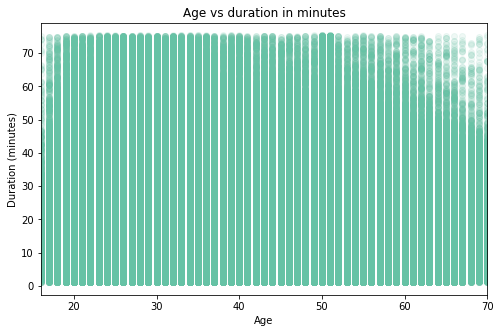

In [43]:
#filtering both outliers of age and duration in minutes
plt.figure(figsize = [8, 5])
sb.regplot(data = durations_less_than_99_percentile, x = 'age', y = 'tripdurationmins', scatter_kws={'alpha':1/10}, fit_reg=False, color=base_color)
plt.xlim(16, 70)
plt.xlabel('Age')
plt.ylabel('Duration (minutes)')
plt.title('Age vs duration in minutes');

Due to the very high number of points all plotted on the scatter plot, we can't really say what's the differences in trip durations between the different ages. We can only observe that the duration is less around 59 years and continues to decrease slightly in people aging 60+. An alternative is to plot this data in a heatmap shown below.

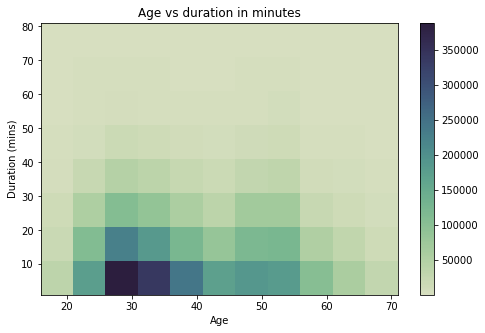

In [140]:
#an alternative view to identify the relationship

#define color palette for heatmap
heatmap_color = sb.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

plt.figure(figsize = [8, 5])
bins_x = np.arange(df_main['age'].min(), age_percentile['99%']+5, 5)
bins_y = np.arange(durations_less_than_99_percentile['tripdurationmins'].min(), durations_less_than_99_percentile['tripdurationmins'].max()+10, 10)

plt.hist2d(data = durations_less_than_99_percentile, x = 'age', y = 'tripdurationmins', cmin=0.5, cmap=heatmap_color, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration (mins)')
plt.title('Age vs duration in minutes');

The heatmap shows that most of the trips across different ages last for around 10 minutes. A good number of the users in their late 20s to early 30s rent the bikes from 10 to 20 minutes also users in late 40s to early 50s. Looking at this graph, I would like to enhance the dataset further by adding an 'age range' column transforming age into a categorical variable.

In [47]:
def get_age_range(x):
    range = ''
    '''Take an age in integer format and return age range'''
    if x < 16:
        range = 'Less than 16'
    elif x >= 16 and x <= 24:
        range =  '16-24'
    elif x >= 25 and x <= 29:
        range = '25-29'
    elif x >=30 and x <= 34:
        range = '30-34'
    elif x >= 35 and x <= 39:
        range = '35-39'
    elif x >= 40 and x <= 44:
        range = '40-44'
    elif x >= 45 and x <= 49:
        range = '45-49'
    elif x >= 50 and x <= 54:
        range = '50-54'
    elif x >= 55 and x <= 59:
        range = '55-59'
    elif x >= 60 and x <= 64:
        range = '60-64'
    elif x >= 65 and x <= 69:
        range = '64-69'
    else:
        range = '70+'
    return range

In [48]:
#change the datatype of the column to categorical
age_range_category = ['16-24', '25-29', '30-34', '35-39', '40-44','45-49', '50-54', '55-59', '60-64', '64-69', '70+']
age_classes = pd.api.types.CategoricalDtype(ordered=True, categories=age_range_category)

In [49]:
#convert the type of the column in the master dataset
df_main['agerange'] = df_main['age'].apply(get_age_range).astype(age_classes)

In [50]:
#convert the type of the column in the dataset without duration outliers
import warnings
warnings.filterwarnings('ignore')

durations_less_than_99_percentile['agerange'] = durations_less_than_99_percentile['age'].apply(get_age_range).astype(age_classes)

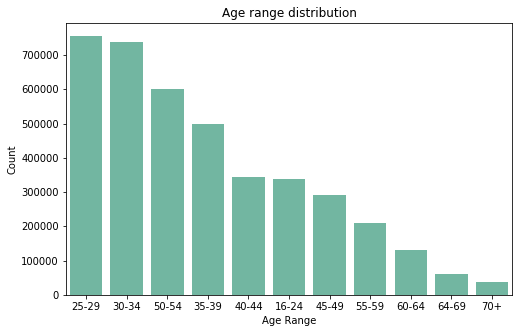

In [141]:
#plot distribution of age ranges
plt.figure(figsize = [8, 5])
range_order = df_main.agerange.value_counts().index
sb.countplot(data=df_main, x='agerange', color=base_color, order=range_order)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age range distribution');

Distribution of age range variable shows that the citi bike is most popular among people between ages of 25-29 followed by 30-34 and 50-54.

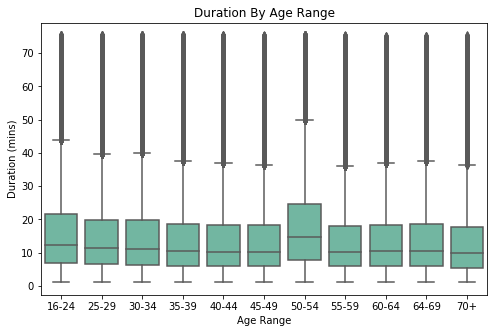

In [436]:
#age range vs duration in minutes
plt.figure(figsize = [8, 5])

sb.boxplot(data=durations_less_than_99_percentile, x='agerange', y='tripdurationmins', color=base_color)
plt.xlabel('Age Range')
plt.ylabel('Duration (mins)')
plt.title('Duration By Age Range');

According to the box plot of age ranges against duration in minutes, the median duration is the highest in age range 50-54. It would be interesting to explore that further in comparison to other variables like if those renters are customers or subscribers. This age group also seems to have the highest maximum of duration of a ride of 50 minutes. Another age group with a slightly higher dustribution of duration is the 16-24. 70+ seems to have a lower median and also a lower maximum just below 40 minutes.

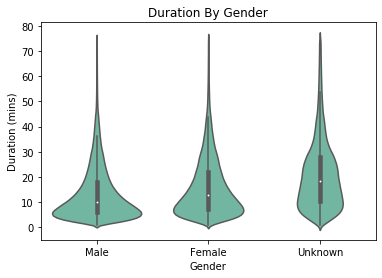

In [408]:
#gender and duration
sb.violinplot(data=durations_less_than_99_percentile, x='gender', y='tripdurationmins', color=base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (mins)')
plt.title('Duration By Gender');

Most males rent the bikes for shorter durations (10 mins on average) compared to females (average slightly higher), the graph shows that females and mostly 'unknown' are distributed across higher durations. With 'unknown' having the highest mean duration of around 20 minutes.

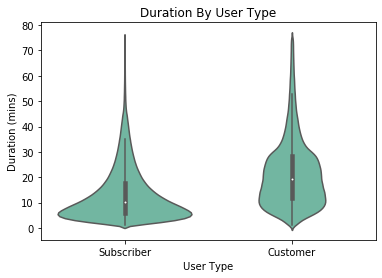

In [409]:
#user type and duration
sb.violinplot(data=durations_less_than_99_percentile, x='usertype', y='tripdurationmins', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.title('Duration By User Type');

Seems that most subscribers go for shorter trips which could make sense since they could be using the bike rental platform to get to specific destinations in their day to day like work or school. While customers on the other hand tend to rent the bikes for longer durations with almost double the average duration of subscribers since they might be tourists renting bikes to go exploring around the city.

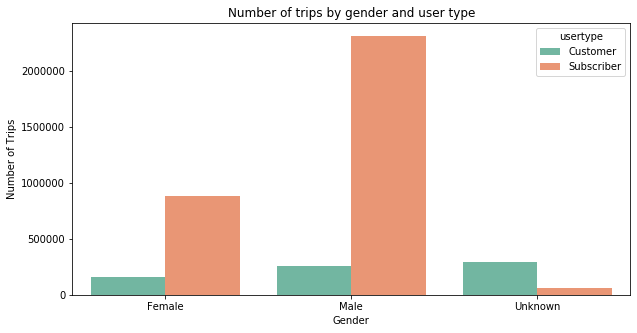

In [143]:
#count trips by gender and user type
trips_gender_usertype = durations_less_than_99_percentile.groupby(['usertype', 'gender'])['bikeid'].count()
trips_gender_usertype = trips_gender_usertype.reset_index(name='trips')
trips_gender_usertype

plt.figure(figsize = [10, 5])

sb.barplot(data = trips_gender_usertype, x = 'gender', y = 'trips',  hue = 'usertype', palette = 'Set2')
plt.title('Number of trips by gender and user type')
plt.xlabel('Gender')
plt.ylabel('Number of Trips');

According to the above graph, most the renters with Unknown gender are customers.

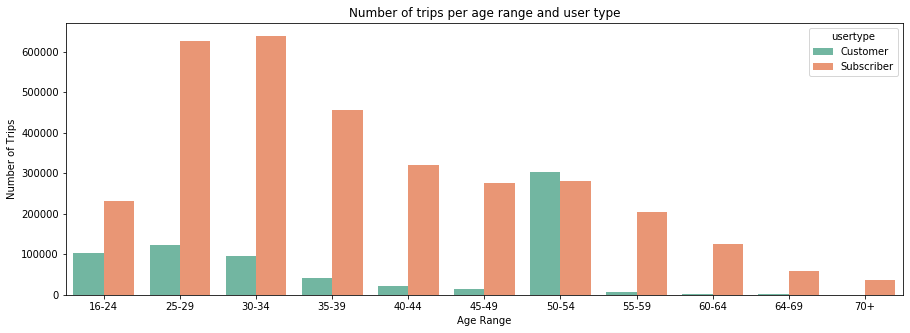

In [133]:
#count trips by age range and user type
trips_age_usertype = durations_less_than_99_percentile.groupby(['usertype', 'agerange'])['bikeid'].count()
trips_age_usertype = trips_age_usertype.reset_index(name='trips')
trips_age_usertype

plt.figure(figsize = [15, 5])

sb.barplot(data = trips_age_usertype, x = 'agerange', y = 'trips',  hue = 'usertype', palette = 'Set2')
plt.title('Number of trips by age range and user type')
plt.xlabel('Age Range')
plt.ylabel('Number of Trips');

Interestingly, seems from the visualization between age range and user type that most users aged 50-54 are customers. Across all the other age groups the number of subscribers is greater than the number of customers.

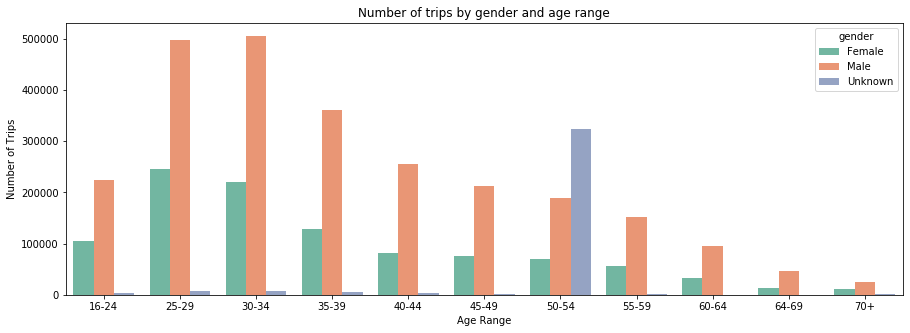

In [134]:
#count trips by age range and gender
trips_age_gender = durations_less_than_99_percentile.groupby(['gender', 'agerange'])['bikeid'].count()
trips_age_gender = trips_age_gender.reset_index(name='trips')
trips_age_gender

plt.figure(figsize = [15, 5])

sb.barplot(data = trips_age_gender, x = 'agerange', y = 'trips',  hue = 'gender', palette = 'Set2')
plt.title('Number of trips by gender and age range')
plt.xlabel('Age Range')
plt.ylabel('Number of Trips');

This confirms the pattern viewed in previous graphs that 'unknown' as the gender is observed most in customers and more of the 50-54 aged users are customers than subscribers which implies that most 50-54 users have 'unknown' as the gender.

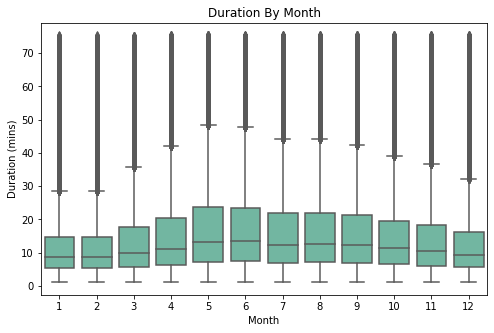

In [483]:
#month and duration
plt.figure(figsize = [8, 5])

sb.boxplot(data=durations_less_than_99_percentile, x='month', y='tripdurationmins', color=base_color)
plt.xlabel('Month')
plt.ylabel('Duration (mins)')
plt.title('Duration By Month');

Looking at the above graph, trips seem to have the highest durations in May and June even though as we saw previously September was the month with the highest number of trips so there is no relation between number of trips and their duration.

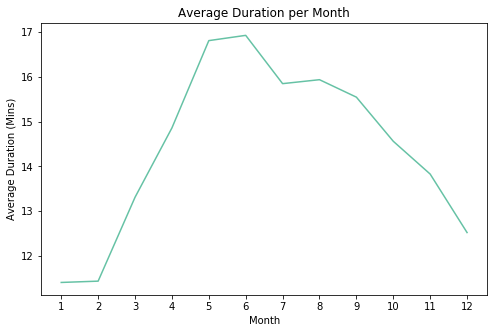

In [484]:
#average duration per month plotted as a line graph to show the change across each month
average_duration_month = durations_less_than_99_percentile.groupby('month')['tripdurationmins'].mean()
average_duration_month = average_duration_month.reset_index(name='meandurationmins')


plt.figure(figsize = [8, 5])

plt.errorbar(data=average_duration_month, x='month', y='meandurationmins', color=base_color)
plt.xticks(average_duration_month.month)
plt.ylabel('Average Duration (Mins)')
plt.xlabel('Month')
plt.title('Average Duration per Month');

This graph shows the changes in the average duration across months, note that this is aggregated data for both years 2019 and 2020. As seen on the graph, January and February are the lowest with trips taking an average of 10 minutes. This begins to increase in March and reachest the highest average duration of 17 minutes in May and June then falls to around 16 in July and August then decreases sharply again until it reaches below 13 minutes in December. This can be investigated with other variables to see if there's a link between duration in those months and the user types. 

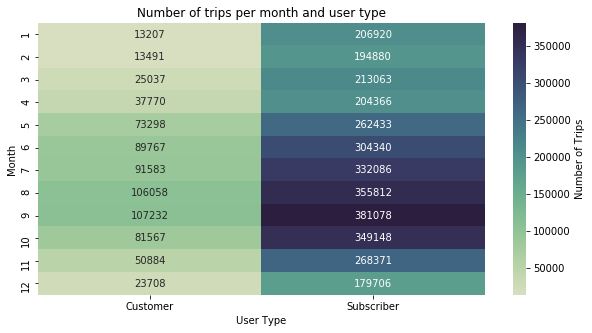

In [123]:
#count trips by usertype and month to investigate the higher duration average in May and June.
trips_user_month = durations_less_than_99_percentile.groupby(['month', 'usertype'])['bikeid'].count()
trips_user_month = trips_user_month.reset_index(name='trips')
trips_user_month = trips_user_month.pivot(index = 'month', columns = 'usertype', values = 'trips')
trips_user_month

plt.figure(figsize = [10, 5])

sb.heatmap(trips_user_month, annot = True, fmt = '.0f', cmap=heatmap_color,
           cbar_kws = {'label' : 'Number of Trips'})
plt.title('Number of trips per month and user type')
plt.xlabel('User Type')
plt.ylabel('Month');

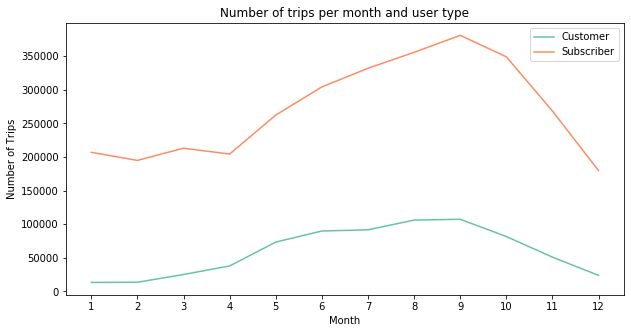

In [125]:
#alternative visualization
plt.figure(figsize = [10, 5])

plt.plot(trips_user_month['Customer'], label="Customer", color = base_color)
plt.plot(trips_user_month['Subscriber'], label="Subscriber", color = secondary_color)
plt.xticks(trips_user_month.index)
plt.ylabel('Number of Trips')
plt.xlabel('Month')
plt.title('Number of trips per month and user type')
plt.legend()
plt.show();

As suspected, the number of customers start to increase around May and June - we've observed before that customers generally have higher average trip durations than subscribers which could explain why the average duration in those months seem higher. Even though the number of customers continue to increase, we can see that in September, the month with the highest number of trips, it is also the highest count of subscribers therefore this takes down the average trip duration.

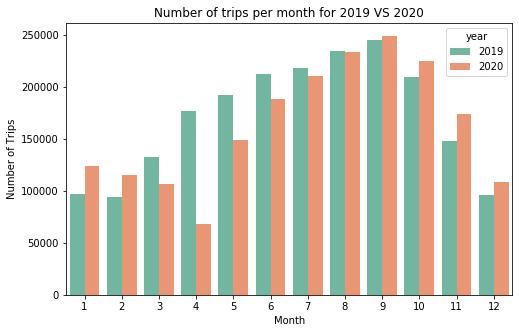

In [514]:
#number of trips per month and year
plt.figure(figsize = [8, 5])
sb.countplot(data = df_main, x = 'month', hue = 'year', palette = 'Set2')
plt.title('Number of trips per month for 2019 VS 2020')
plt.xlabel('Month')
plt.ylabel('Number of Trips');

This graph shows how in the beginning of 2020 the number of trips were higher in Jan and Feb but fell in March which marks the start of the first COVID-19 lockdown and continued to fall dramatically in April. Number of trips continued to be less and looked to start to recover back to previous year's numbers by August. By September, 2020 numbers seem to have been higher which shows a recovery and continued to be higher than 2019 in the remaining months until the end of the year.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
After several iterations to come to the best visualization to check the relationship between age and average trip duration, I transformed the age column into a categorical variable age range and was able to observe that age range 50-54 has the highest trip duration average followed by the age range 16-24. Female users seem to rent the bikes for longer durations and customers spend more time renting the bikes than subscribers. Finally, June is the month with highest average trip duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Most customers have 'unknown' as the gender and most users aged 50-54 are customers. Also it seems that COVID-19 impaced the bike rental platform since number of trips began to decline in March and there was a sharp fall in April. However, an interesting observation is that by September number of trips taken in 2020 were higher than previous year and this trend carried on for the rest of the year.

<a id='ME'></a>
## Multivariate Exploration

In the below section, I'd like to continue investigating the impact of COVID-19 on average trip durations and take a closer look on how user type and month impact average trip duration as well as the relation between age range and gender to conclude what are the most common characteristics affecting the trip duration.

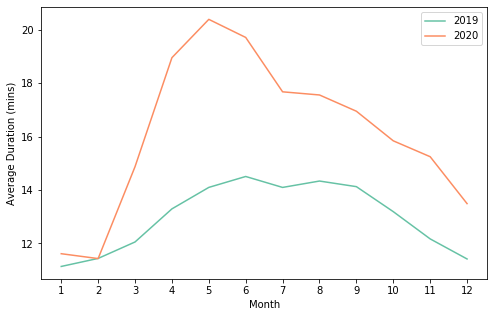

In [74]:
#Average duration per month and year to show impact of COVID-19 on duration of trips

plt.figure(figsize = [8, 5])
average_duration_month_year = durations_less_than_99_percentile.groupby(['month', 'year'])['tripdurationmins'].mean()
average_duration_month_year = average_duration_month_year.reset_index(name='meandurationmins')
average_duration_month_year = average_duration_month_year.pivot(index = 'month', columns = 'year', values = 'meandurationmins')

plt.plot(average_duration_month_year[2019], label="2019", color = base_color)
plt.plot(average_duration_month_year[2020], label="2020", color = secondary_color)
plt.xticks(average_duration_month_year.index)
plt.ylabel('Average Duration (mins)')
plt.xlabel('Month')
plt.legend()
plt.show();

Very interesting! Even though we already know that number of trips between March and August 2020 was lower than the same months in 2019, this graph shows that the average duration of trips was actually higher. This could indicate that due to lockdown when shops, work, schools and other facilities were closed, people would have had more time to rent bikes to enjoy the outdoors in a socially distanced activity.

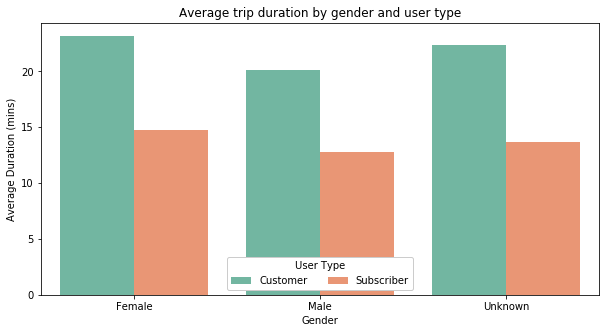

In [511]:
# Average trip duration by gender and user type

average_duration_gender_user = durations_less_than_99_percentile.groupby(['gender', 'usertype'])['tripdurationmins'].mean()
average_duration_gender_user = average_duration_gender_user.reset_index(name='meandurationmins')

plt.figure(figsize = [10, 5])

ax = sb.barplot(data = average_duration_gender_user, x = 'gender', y = 'meandurationmins', hue = 'usertype', palette = 'Set2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type')
plt.xlabel('Gender')
plt.ylabel('Average Duration (mins)')
plt.title('Average trip duration by gender and user type');

This graph follows the same trends observed before showing that customers in general rent the bikes for increased durations than subscribers and females in particular have a higher average trip duration than male bike renters.

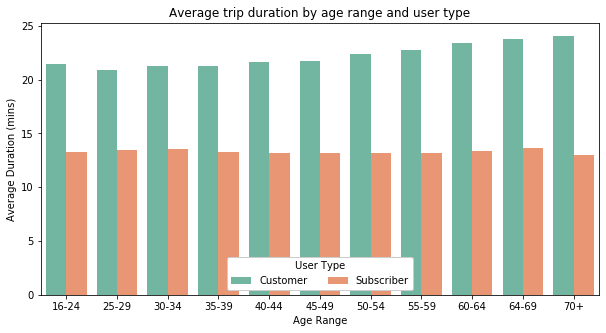

In [145]:
#average trip duration by age range and user type
average_duration_age_user = durations_less_than_99_percentile.groupby(['agerange', 'usertype'])['tripdurationmins'].mean()
average_duration_age_user = average_duration_age_user.reset_index(name='meandurationmins')

plt.figure(figsize = [10, 5])

ax = sb.barplot(data = average_duration_age_user, x = 'agerange', y = 'meandurationmins', hue = 'usertype', palette = 'Set2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type')
plt.xlabel('Age Range')
plt.ylabel('Average Duration (mins)')
plt.title('Average trip duration by age range and user type');

Comparing the average trip duration to different user types and age ranges, again it's confirmed that customers in general have a higher average trip duration. An interesting observation though is that customers aged 70+ have the highest average trip duration. Looking at the value counts below, out of a total of around 600 records where user type is customer and age range 70+, around 500 are between 70-75 and the rest are above 80 with values reaching 130 years. Based on the fact that a lot of customers also have gender 'unknown' I wouild assume that the age data gathered for the customers are not very accurate for the extreme age values 80+. But there sure is a trend that shows that older aged customers enjoy riding the bikes for longer durations.

In [159]:
#visually assessing the age for 70+ customers
durations_less_than_99_percentile.query('agerange == "70+" & usertype == "Customer"').age.value_counts()

70     128
71      89
73      88
72      52
74      47
76      43
77      34
75      31
120     15
80      13
102     11
119      9
78       9
79       9
82       6
91       5
86       5
83       5
104      4
88       4
87       4
95       4
81       3
89       3
90       3
85       2
100      2
101      2
106      2
126      2
84       1
130      1
92       1
93       1
97       1
99       1
107      1
118      1
131      1
Name: age, dtype: int64

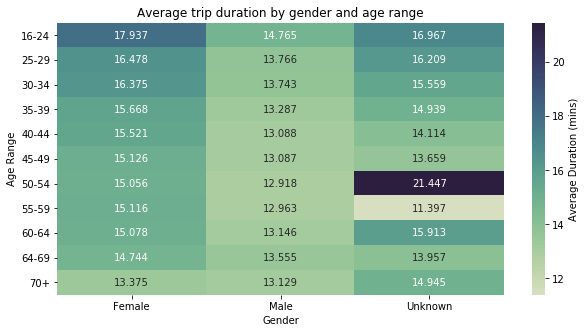

In [512]:
# Average trip duration by age range and gender

average_duration_gender_age = durations_less_than_99_percentile.groupby(['gender', 'agerange'])['tripdurationmins'].mean()
average_duration_gender_age = average_duration_gender_age.reset_index(name='meandurationmins')
average_duration_gender_age = average_duration_gender_age.pivot(index = 'agerange', columns = 'gender', values = 'meandurationmins')
average_duration_gender_age

plt.figure(figsize = [10, 5])

sb.heatmap(average_duration_gender_age, annot = True, fmt = '.3f', cmap=heatmap_color,
           cbar_kws = {'label' : 'Average Duration (mins)'})
plt.title('Average trip duration by gender and age range')
plt.xlabel('Gender')
plt.ylabel('Age Range');

We already know that most users aged 50-54 have an unknown gender that would explain why the visualization shows this is the group with the highest average duration in minutes. This is followed by Females aged 16-24.

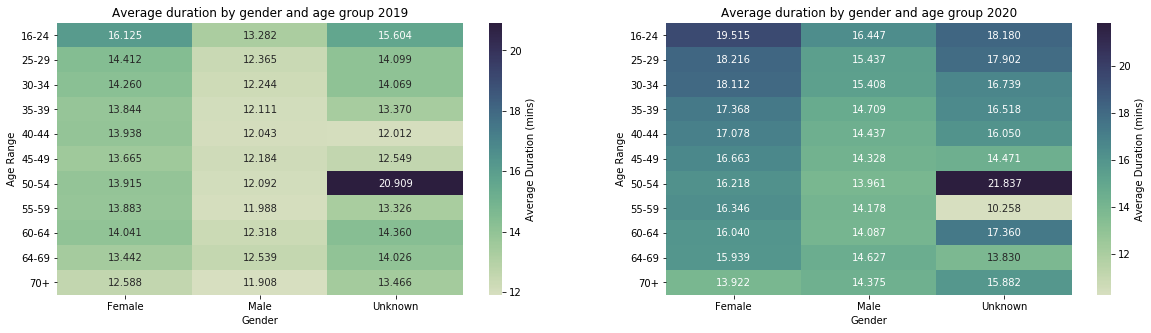

In [72]:
#faceted by year to compare pre and post covid
average_duration_gender_age_2019 = durations_less_than_99_percentile.groupby(['agerange', 'year', 'gender'])['tripdurationmins'].mean()
average_duration_gender_age_2019 = average_duration_gender_age_2019.reset_index(name='meandurationmins')

#create another dataframe for 2020 data
average_duration_gender_age_2020 = average_duration_gender_age_2019.query('year == 2020')
average_duration_gender_age_2019.drop(average_duration_gender_age_2019.query('year == 2020').index, inplace=True)
#pivot both
average_duration_gender_age_2019 = average_duration_gender_age_2019.pivot(index = 'agerange', columns = 'gender', values = 'meandurationmins')
average_duration_gender_age_2020 = average_duration_gender_age_2020.pivot(index = 'agerange', columns = 'gender', values = 'meandurationmins')
#display both
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1) 
sb.heatmap(average_duration_gender_age_2019, annot = True, fmt = '.3f', cmap=heatmap_color,
           cbar_kws = {'label' : 'Average Duration (mins)'})
plt.title('Average duration by gender and age group 2019')
plt.xlabel('Gender')
plt.ylabel('Age Range');

plt.subplot(1, 2, 2)
sb.heatmap(average_duration_gender_age_2020, annot = True, fmt = '.3f', cmap=heatmap_color,
           cbar_kws = {'label' : 'Average Duration (mins)'})
plt.title('Average duration by gender and age group 2020')
plt.xlabel('Gender')
plt.ylabel('Age Range');

Trend seems to be the same for average duration across age range and gender even though as observed before, the average trip durations are higher in 2020 compared to same groups in 2019.

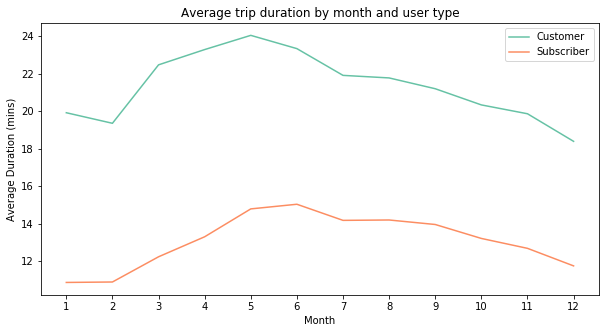

In [109]:
#average duration across the user types per month
average_duration_month_user = durations_less_than_99_percentile.groupby(['month', 'usertype'])['tripdurationmins'].mean()
average_duration_month_user = average_duration_month_user.reset_index(name='meandurationmins')
average_duration_month_user = average_duration_month_user.pivot(index = 'month', columns = 'usertype', values = 'meandurationmins')

plt.figure(figsize = [10, 5])

plt.plot(average_duration_month_user['Customer'], label="Customer", color = base_color)
plt.plot(average_duration_month_user['Subscriber'], label="Subscriber", color = secondary_color)
plt.xticks(average_duration_month_user.index)
plt.ylabel('Average Duration (mins)')
plt.xlabel('Month')
plt.title('Average trip duration by month and user type')
plt.legend()
plt.show();

This graph shows the change in average duration per user type throughout the year. As we can see the customers have almost double the average trip duration compared to subscribers. The customers average trip duration reaches the peak of 24 minutes in May compared to around 15 minutes for subscribers. I think this graph truly differentiates that the user type is a good indicator or predictor of the trip duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I think looking at the interactions between the variables that the month and user type did strengthen each other because as the number of customers increased in May and June, we started seeing an increase in the average trip duration as well. The other thing that stood out more to me is the fact that user type is one of the strongest indicators of trip duration and that for customers there might be some demographic information that is being dropped or errors are occurring when collecting them so could be useful for Citi Bike to have some measures in place to enhance that data. 

### Were there any interesting or surprising interactions between features?

The most surpirising observation is that the average trip duration was higher in 2020 when compared to 2019 even though that was during the COVID-19 pandemic! Also, when looking at the age range against the user type and average trip duration, it seems that older customers tend to enjoy bike trips for longer durations.